![Youtube & Spotify EDA Analysis](C:\Users\LENOVO\youtube_spotify.png)
# Spotify & Youtube EDA Analysis

### Data Preparation

In [1]:
#Import of Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("SpotifyYoutube.csv")  # Reading of Data

In [3]:
df.head(5) # General overview

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [4]:
df.info() # Data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

### Data Cleaning

In [5]:
# Deleting columns which not to be used for EDA
df.drop(columns=
             ['Unnamed: 0','Url_spotify','Uri','Url_youtube','Description','Stream'] ,inplace=True) 

In [6]:
#NULL values 
df.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Licensed            470
official_video      470
dtype: int64

In [7]:
# Fill NULL values with mean of others for numerial columns
numerical_columns =['Danceability','Energy','Key','Loudness','Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',
'Views','Likes','Comments']
for x in numerical_columns:
    df[x].fillna(df[x].mean(), inplace=True)

In [8]:
# NULL values again
df.isna().sum()

Artist                0
Track                 0
Album                 0
Album_type            0
Danceability          0
Energy                0
Key                   0
Loudness              0
Speechiness           0
Acousticness          0
Instrumentalness      0
Liveness              0
Valence               0
Tempo                 0
Duration_ms           0
Title               470
Channel             470
Views                 0
Likes                 0
Comments              0
Licensed            470
official_video      470
dtype: int64

In [9]:
# Deleting all remainin NULL values (string values)
df=df.dropna()  

In [10]:
#Checking final situations of NULL values
df.isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
dtype: int64

In [11]:
 # Checking if there are duplicated values
df.duplicated().sum() 

0

In [13]:
#Ovierview of final data 
df.head(5)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Valence,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,0.772,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,0.852,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,0.551,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,0.578,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,0.525,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True


### EDA Analysis

In [14]:
# General describe of all values 
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
Danceability,20248.0,6.202035e-01,1.652583e-01,0.000000,5.190000e-01,6.380000e-01,7.410000e-01,9.750000e-01
Energy,20248.0,6.349722e-01,2.138292e-01,0.000020,5.077500e-01,6.660000e-01,7.970000e-01,1.000000e+00
Key,20248.0,5.303502e+00,3.578015e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,20248.0,-7.665131e+00,4.616800e+00,-46.251000,-8.832500e+00,-6.540000e+00,-4.939750e+00,9.200000e-01
Speechiness,20248.0,9.606768e-02,1.101969e-01,0.000000,3.560000e-02,5.050000e-02,1.030000e-01,9.640000e-01
Acousticness,20248.0,2.891459e-01,2.860897e-01,0.000001,4.380000e-02,1.900000e-01,4.720000e-01,9.960000e-01
Instrumentalness,20248.0,5.600283e-02,1.932142e-01,0.000000,0.000000e+00,2.500000e-06,4.840000e-04,1.000000e+00
Liveness,20248.0,1.915544e-01,1.655405e-01,0.014500,9.400000e-02,1.250000e-01,2.340000e-01,1.000000e+00
Valence,20248.0,5.293055e-01,2.456478e-01,0.000000,3.390000e-01,5.360000e-01,7.260000e-01,9.930000e-01
Tempo,20248.0,1.206041e+02,2.958156e+01,0.000000,9.700200e+01,1.199640e+02,1.399310e+02,2.433720e+02


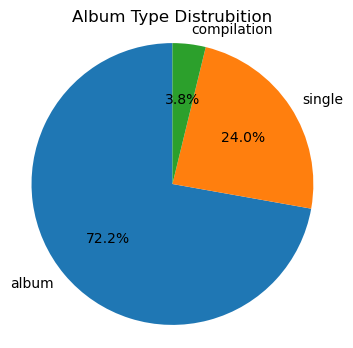

In [15]:
# Album Type Distrubition 
type_value_counts = df['Album_type'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(type_value_counts, labels=type_value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Album Type Distrubition')
plt.axis('equal')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

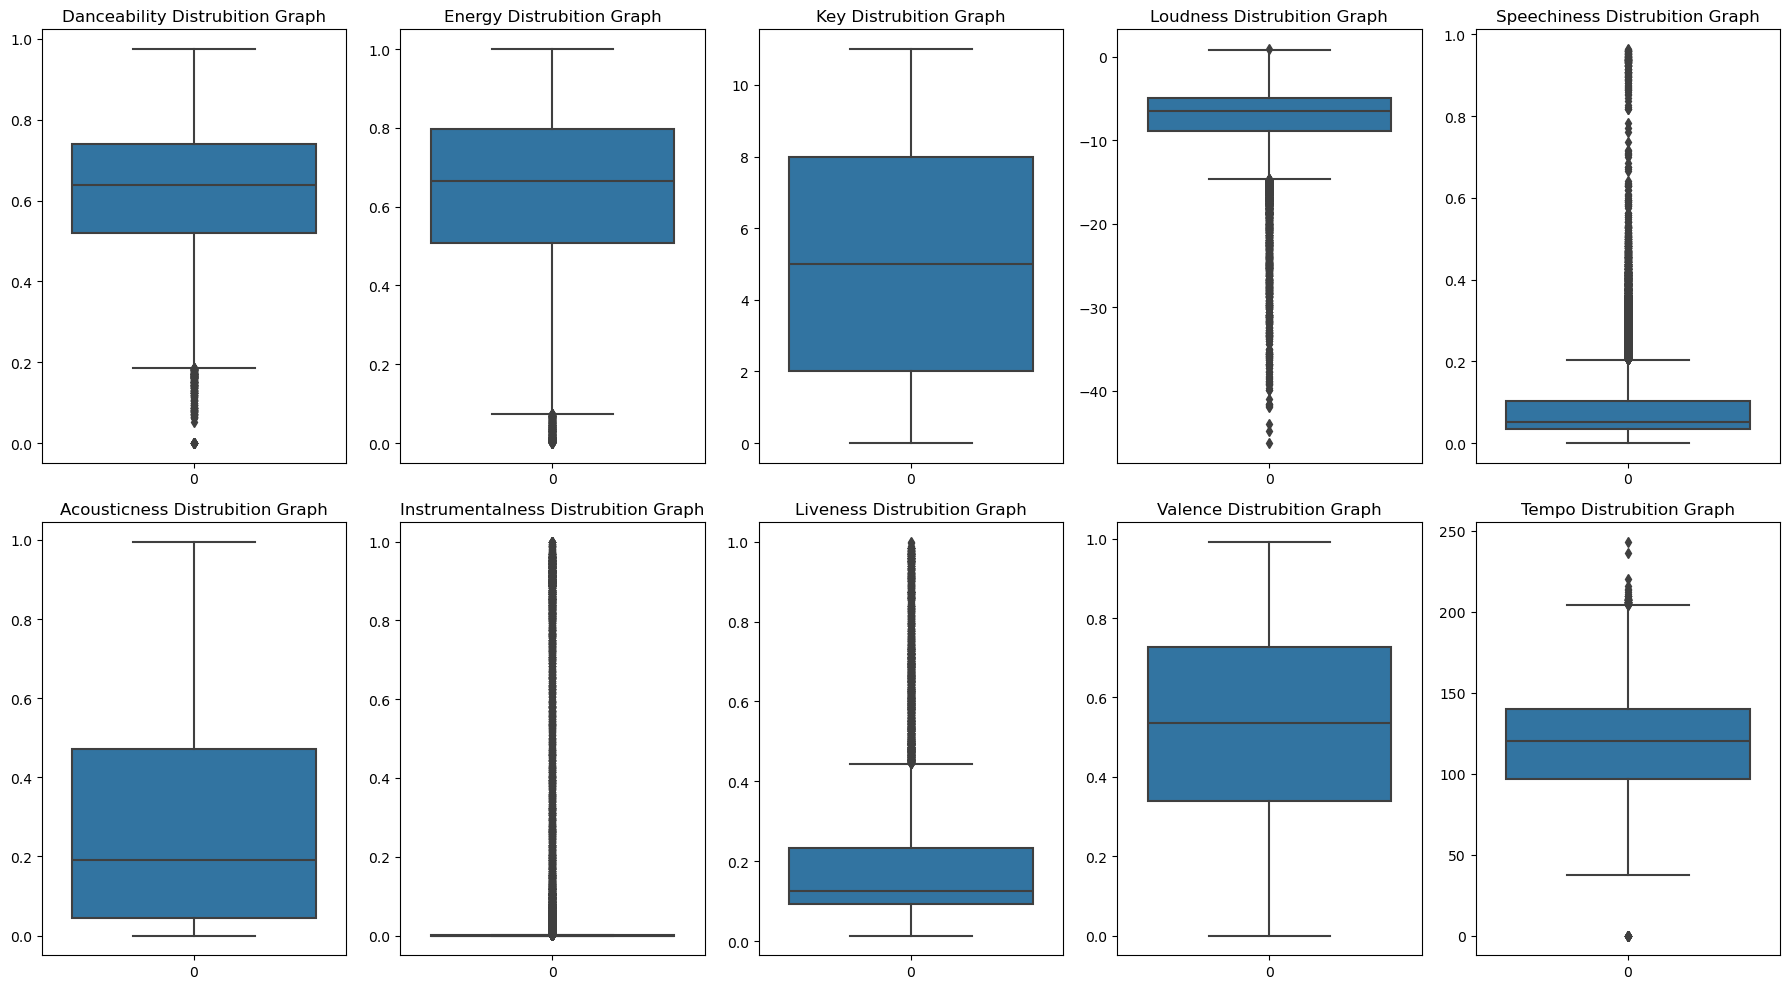

In [16]:
# Distrubition of numerical values of songs
columns = df.iloc[:, 4:14]
fig, axs = plt.subplots(2,5, figsize=(18,10))
for i in range(5):
    sns.boxplot(data=columns.iloc[:,i], ax=axs[0,i])
    axs[0,i].set_title(f'{columns.columns[i]} Distrubition Graph')
    axs[0,i].set_xlabel('')
for i in range(5):
    sns.boxplot(data=columns.iloc[:,i+5], ax=axs[1,i])
    axs[1,i].set_title(f'{columns.columns[i+5]} Distrubition Graph')
    axs[1,i].set_xlabel('')
plt.tight_layout()
plt.show

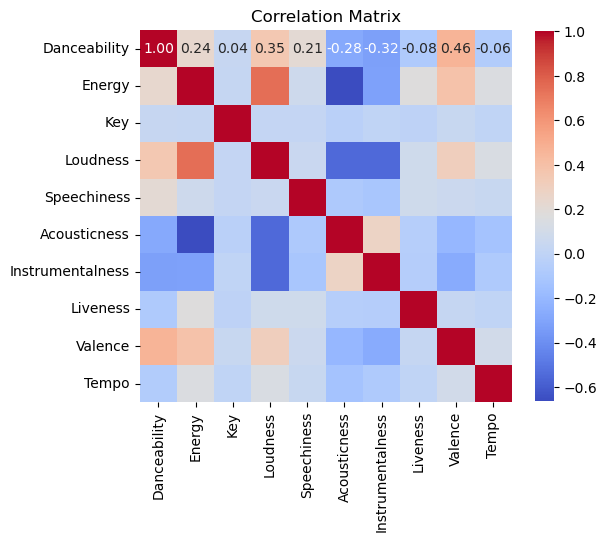

In [17]:
# Correlation matrix of song's numerical values 
columns = df.columns[4:14]
df_subset  = df[columns]
correlation_matrix = df_subset.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink':.8})
plt.title('Correlation Matrix')
plt.show()

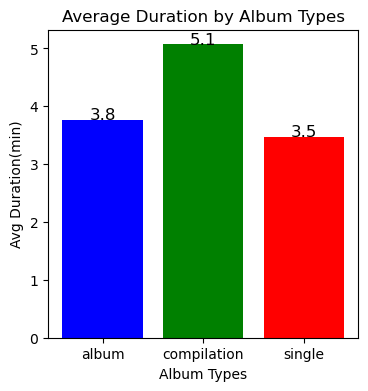

In [18]:
# Average Duration of songs by Album Types
avg_duration = df.groupby('Album_type')['Duration_ms'].mean().reset_index()
avg_duration['Duration_ms']=avg_duration['Duration_ms']/60000
plt.figure(figsize=(4,4))
bars = plt.bar(avg_duration['Album_type'], avg_duration['Duration_ms'], color=['blue', 'green', 'red'])
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(),f'{bar.get_height():.1f}', ha='center', fontsize=12)
plt.title('Average Duration by Album Types')
plt.xlabel('Album Types')
plt.ylabel('Avg Duration(min)')
plt.xticks(rotation=0)
plt.show()

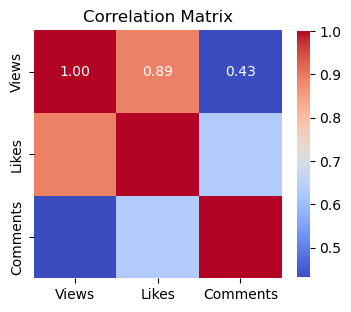

In [19]:
# Correlation matrix of Views, Likes and Comments 
columns = df.columns[17:20]
df_subset  = df[columns]
correlation_matrix = df_subset.corr()
plt.figure(figsize=(4,4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink':.8})
plt.title('Correlation Matrix')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9444\2325220046.py:25: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9444\2325220046.py:25: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9444\2325220046.py:25: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9444\2325220046.py:25: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9444\2325220046.py:25: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
C:\Users\LENOVO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canva

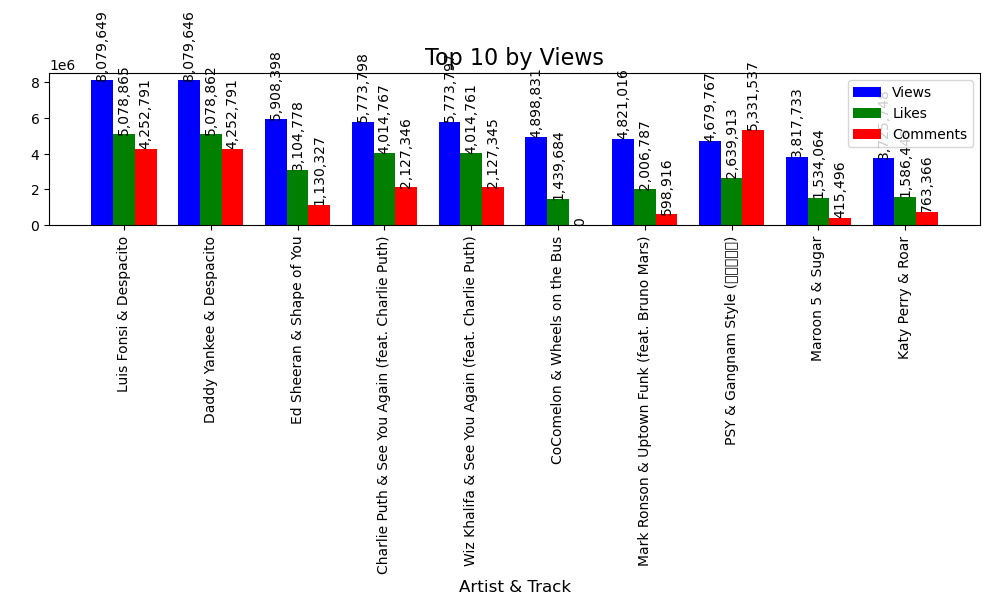

In [20]:
# Top 10 Songs

top_10=df.nlargest(10, 'Views')
plt.figure(figsize=(10,6))
bar_width=0.25
index=np.arange(len(top_10))
top_10['Views']=top_10['Views']/1000
top_10['Likes']=top_10['Likes']/10

bars1=plt.bar(index, top_10['Views'], bar_width, label='Views', color='blue')
bars2=plt.bar(index+bar_width, top_10['Likes'], bar_width, label='Likes', color='green')
bars3=plt.bar(index+2*bar_width, top_10['Comments'], bar_width, label='Comments', color='red')

for bar in bars1:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+5000, f'{int(bar.get_height()):,}', ha='center', va='bottom', rotation=90,  fontsize=10)
for bar in bars2:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+5000, f'{int(bar.get_height()):,}', ha='center', va='bottom', rotation=90, fontsize=10)
for bar in bars3:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+5000, f'{int(bar.get_height()):,}', ha='center', va='bottom', rotation=90, fontsize=10)
plt.title('Top 10 by Views', fontsize=16)
plt.xlabel('Artist & Track', fontsize=12)
plt.ylabel('  ', fontsize=12)
plt.xticks(index+bar_width, top_10['Artist']+' & '+ top_10['Track'], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

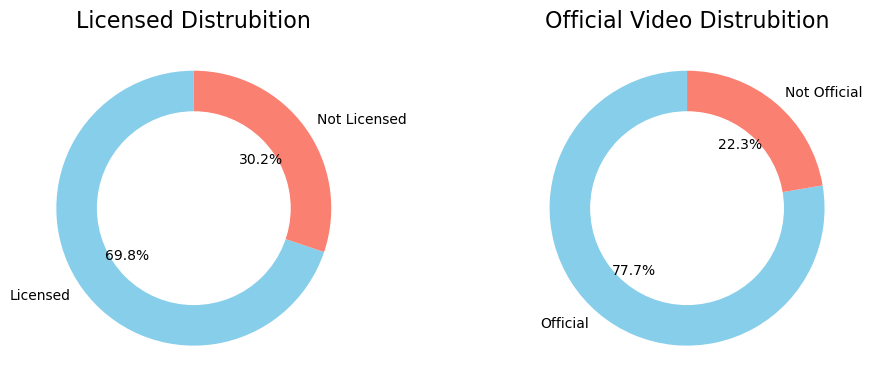

In [21]:
# Licensed Songs & Official Videos Distrubition 
lic_counts = df['Licensed'].value_counts()
off_vid_counts = df['official_video'].value_counts()
fig, axs = plt.subplots(1,2, figsize=(10,4))

axs[0].pie(lic_counts, labels=['Licensed' if label else 'Not Licensed' for label in lic_counts.index], autopct= '%1.1f%%', startangle=90, colors=['skyblue','salmon'])
axs[0].add_artist(plt.Circle((0,0), 0.70, color='white'))
axs[0].set_title('Licensed Distrubition', fontsize=16)

axs[1].pie(off_vid_counts, labels=['Official' if label else 'Not Official' for label in off_vid_counts.index], autopct= '%1.1f%%', startangle=90, colors=['skyblue','salmon'])
axs[1].add_artist(plt.Circle((0,0), 0.70, color='white'))
axs[1].set_title('Official Video Distrubition', fontsize=16)

plt.tight_layout()
plt.show()

In [22]:
# Official but not licensed songs;
no_lic_songs = df[(df['official_video']==True) & (df['Licensed']==False)]
print(no_lic_songs[['Artist', 'Track']])

                  Artist                                              Track
6               Gorillaz  New Gold (feat. Tame Impala and Bootie Brown) ...
75             Radiohead                              Weird Fishes/ Arpeggi
137    Pharrell Williams  JUGGERNAUT (feat. Lil Uzi Vert & Pharrell Will...
142               Khalid                                            Silence
144               Khalid                    Eastside (with Halsey & Khalid)
...                  ...                                                ...
20631                IVE                                            Take It
20632                IVE                          ELEVEN -Japanese version-
20676     Grupo Frontera                             Ya Me Entere - En Vivo
20682          Jung Kook  Dreamers [Music from the FIFA World Cup Qatar ...
20700           ThxSoMch                                     Keep It Tucked

[1583 rows x 2 columns]


### Let's listen to music according to our mood

In [31]:
# Let's dance together 
top5_dance = df.nlargest(5, 'Danceability')[['Artist','Track','Danceability']]
top5_dance

,Artist,Track,Danceability
750,Timbaland,Give It To Me,0.975
16555,BIA,CAN'T TOUCH THIS,0.975
18822,Dave,Funky Friday,0.975
8498,Xavier Wulf,Psycho Pass,0.973
1212,Juicy J,RIP Young (feat. Project Pat & Juicy J) - Remix,0.971


In [32]:
# Make here some noise 
top5_noise = df.nlargest(5, 'Loudness')[['Artist','Track','Loudness']]
top5_noise

,Artist,Track,Loudness
9423,Sub Focus,Siren,0.920
18354,Montell Fish,Exscape,0.829
15187,Shilpi Raj,Le Le Aayi Coca Cola,0.561
10578,"Sergio Vega ""El Shaka""",Me Gusta Estar Contigo,0.522
12543,French Montana,Welcome to the Party (with French Montana & Li...,0.175


In [33]:
# Shhh baby is sleeping
top5_slience = df.nsmallest(5, 'Loudness')[['Artist','Track','Loudness']]
top5_slience

,Artist,Track,Loudness
13847,White Noise for Babies,Cricket Sound 4 - Loopable With No Fade,-46.251
4057,Erik Satie,Enfantillages pittoresques: II. Berceuse,-44.761
7124,Claudio Abbado,"The Nutcracker Suite, Op. 71a, TH 35: IIb. Dan...",-43.988
5356,Robert Schumann,"Kinderszenen, Op. 15: 1. Von fremden Ländern u...",-41.932
14942,C418,Key,-41.766


In [35]:
# Reading book or listening to book ?
top5_book = df.nlargest(5, 'Speechiness')[['Artist','Track','Speechiness']]
top5_book

,Artist,Track,Speechiness
5158,Sir Arthur Conan Doyle,Teil 7 - Sherlock Holmes und der blinde Bettle...,0.964
5152,Sir Arthur Conan Doyle,Teil 1 - Sherlock Holmes und die Geheimwaffe -...,0.962
996,Bibi Blocksberg,Kapitel 09: Der Hexenbesenausflug (Folge 146),0.961
5161,Sir Arthur Conan Doyle,Teil 9 - Sherlock Holmes und ein Brief von der...,0.960
13418,Sherlock Holmes,Teil 14 - Fall 53: Die sieben Zinnsoldaten,0.960


In [36]:
# Coffee time with some acoustic
top5_acoustic = df.nlargest(5, 'Acousticness')[['Artist','Track','Acousticness']]
top5_acoustic

,Artist,Track,Acousticness
2757,Pyotr Ilyich Tchaikovsky,"Album for the Young, Op. 39: No. 3. Mamma (Maman)",0.996
3638,Joe Hisaishi,You're in Love,0.996
4056,Erik Satie,Gnossienne No. 1,0.996
4058,Erik Satie,Gnossienne: No. 1,0.996
4060,Erik Satie,3 Gymnopédies: No. 1 Lent et douloureux,0.996


In [46]:
# On the road
top5_tempo = df.nlargest(5, 'Tempo')[['Artist','Track','Tempo']]
top5_tempo

,Artist,Track,Tempo
6006,J.J. Cale,Call The Doctor,243.372
4260,Riton,Chale (feat. Clementine Douglas),236.059
19489,YNW Melly,Mama Cry,220.099
8526,ZZ Top,Jesus Just Left Chicago - 2006 Remaster,215.918
10794,Tony Dize,Permitame,214.025
